<a href="https://colab.research.google.com/github/BatoolMM/fastai/blob/master/Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The First Chapter**

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.6MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 358kB 54.4MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 1.0MB 51.7MB/s 
     |████████████████████████████████| 92kB 13.0MB/s 
     |████████████████████████████████| 40kB 3.9MB/s 
     |████████████████████████████████| 40kB 7.1MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 61kB 10.8MB/s 
     |████████████████████████████████| 2.6MB 60.8MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.all import *
# !pip install ipywidgets
# import ipywidgets as widgets
# !jupyter nbextension enable --py widgetsnbextension
# !python3 -m pip install --upgrade pip
# !python3 -m pip install --upgrade Pillow

In [5]:
data = untar_data(URLs.PETS)/'images'

In [6]:
def is_cat(x):
    return x[0].isupper()

In [7]:
data_str = ImageDataLoaders.from_name_func(data, 
                                           get_image_files(data),
                                           valid_pct = 0.2, 
                                           seed =42,
                                           label_func = is_cat,
                                           item_tfms = Resize(224))

In [8]:
model = cnn_learner(data_str, resnet34, metrics=error_rate)
model.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.161170,0.025869,0.008119,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.057979,0.026976,0.008119,00:55


In [9]:
image_uploader = widgets.FileUpload()
image_uploader

FileUpload(value={}, description='Upload')

In [10]:
img = PILImage.create(image_uploader.data[0])

In [ ]:
is_cat, _,prob = model.predict(img)

In [12]:
print(f"Is this a cat?: {is_cat}.")
print(f"Prob it's a cat: {prob[1].item():6f}")

Is this a cat?: True.
Prob it's a cat: 1.000000


# **The Second Chapter** 

In [ ]:
!pip install azure-cognitiveservices-search-imagesearch
import os
from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth

In [4]:
def search_images_bing(key, term, min_sz=128):
    client = api('https://api.cognitive.microsoft.com', auth(key))
    return L(client.images.search(query=term, count=150, min_height=min_sz, min_width=min_sz).value)

In [7]:
key = '8d86a0d22d7643549e560f18abfe8fde'
Dieffenbachia = search_images_bing(key, "Dieffenbachia")
images_Dieffenbachia = Dieffenbachia.attrgot('content_url')


In [11]:
len(images_Dieffenbachia)

(#150) ['https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Dieffenbachia_oerstedii_kz2.jpg/1200px-Dieffenbachia_oerstedii_kz2.jpg','http://plantsrescue.com/wp-content/uploads/2013/06/Dieffenbachia-exotica.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Colpfl29.jpg/1920px-Colpfl29.jpg','https://assets.bakker.com/ProductPics/810x978/71900-01-BAKI_20190430091911.jpg','https://www.greensouq.ae/wp-content/uploads/2018/02/Dieffenbachia-seguine-Tropic-Snow-Dieffenbachia.jpg','https://curransflowers.imgix.net/images/item/Dieffenbachia6whitebackground-4940-16080630816.jpg?w=950&auto=format','https://www.greensouq.ae/wp-content/uploads/2018/02/Dieffenbachia-Camilla.jpg','https://nurserynature.com/788-large_default/dieffenbachia-compacta-plant.jpg','http://miamitropicalplants.com/wp-content/uploads/2015/10/Dieffenbachia-Tropic-Snow.jpg','https://eastcoasttropicals.com/wp-content/uploads/2017/01/Dieffenbachia-Camille-2.jpg'...]

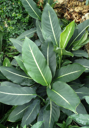

In [19]:
dest = 'Dieffenbachia_oerstedii_kz2.jpg'
download_url(images_Dieffenbachia[0], dest)
img = Image.open(dest)
img.to_thumb(128.128)